#### Back to Top

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exploratory Data Analysis

[Dependent Variable](#Dependent-Variable)

#### Read in the Source Data

In [2]:
df = pd.read_csv('../data/04_Full_DataFrame.csv',
                index_col = 'key_name_date')

#### Limit to Only Valid Data Points

In [3]:
df = df[df['available']==1]

#### Examine Features

In [5]:
date_features = ['high_season','weekend','holiday','logan_pass']
air_features = ['aqi','ozone','PM10','PM25']
cg_features = ['fee','sites','flush_toilets','showers','disposal_station','reservations','rv','primitive','isolated']
wx_features = ['PRCP','SNOW','TMAX','TMIN','did_PRCP','did_SNOW']

## Look for High Collinearity within our Feature Sets

### Date Features

Nothing troublesome in the date columns

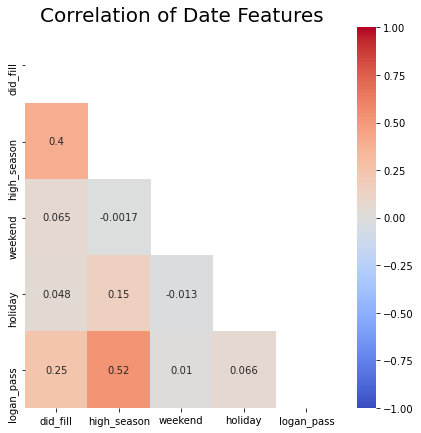

In [27]:
plt.figure(figsize=(7,7))

target = df[['did_fill'] + date_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Date Features',fontsize=20);

### Air Quality Features

* Extremely high correlation between PM25, PM10, and AQI

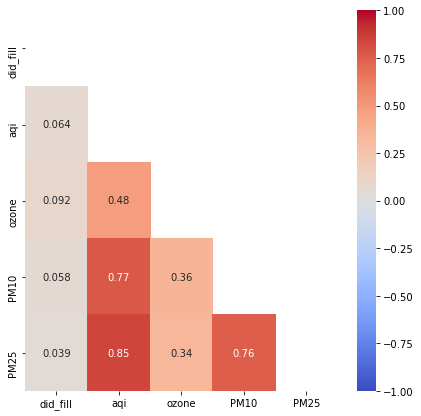

In [22]:
plt.figure(figsize=(7,7))


target = df[['did_fill'] + air_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Air Quality Features',fontsize=20);

#### Do PCA

In [30]:
sc_air = StandardScaler()
air_scaled = sc_air.fit_transform(df[air_features])

pca_air = PCA(random_state = 42)

pca_air.fit(air_scaled)

z_air = pca_air.transform(air_scaled)

pca_air.explained_variance_ratio_

array([0.71385499, 0.19187289, 0.06213666, 0.03213546])

### Campground Features

* High correlations across all features, given there's only 13 campgrounds

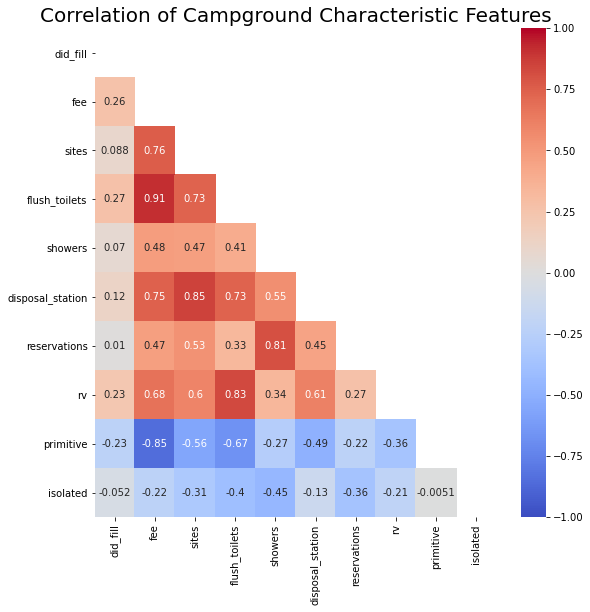

In [30]:
plt.figure(figsize=(9,9))

target = df[['did_fill'] + cg_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Campground Characteristic Features',fontsize=20);

Justification
* Can't use fee because I can't assume its been the same value for 20 years
* Use sites because its an integer
* Use primitive




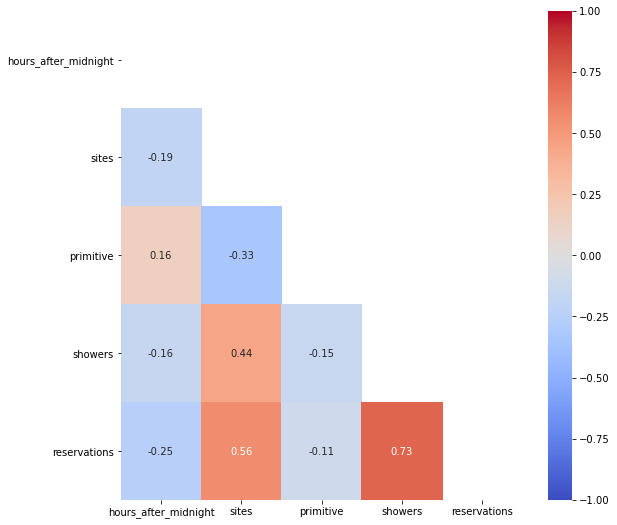

In [32]:
plt.figure(figsize=(9,9))

target = df.loc[df['did_fill']==1,
                ['hours_after_midnight'] + ['sites','primitive','showers','reservations']].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

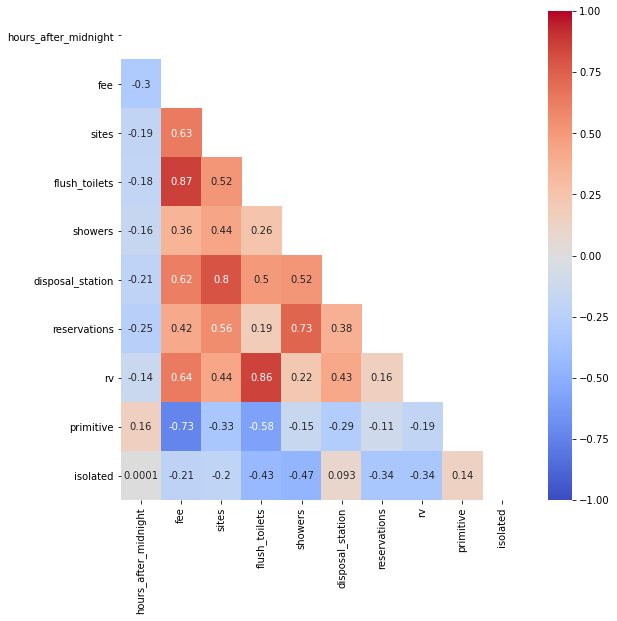

In [33]:
plt.figure(figsize=(9,9))

target = df.loc[df['did_fill']==1,
                ['hours_after_midnight'] + cg_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

#### Do some PCA

In [34]:
sc_cg = StandardScaler()
cg_scaled = sc_cg.fit_transform(df[cg_features])

pca_cg = PCA(random_state = 42)

pca_cg.fit(cg_scaled)

z_cg = pca_cg.transform(cg_scaled)

pca_cg.explained_variance_ratio_

array([0.57894167, 0.16374894, 0.09613236, 0.07164658, 0.0481232 ,
       0.02804635, 0.01127409, 0.00149102, 0.00059577])

### Weather Features

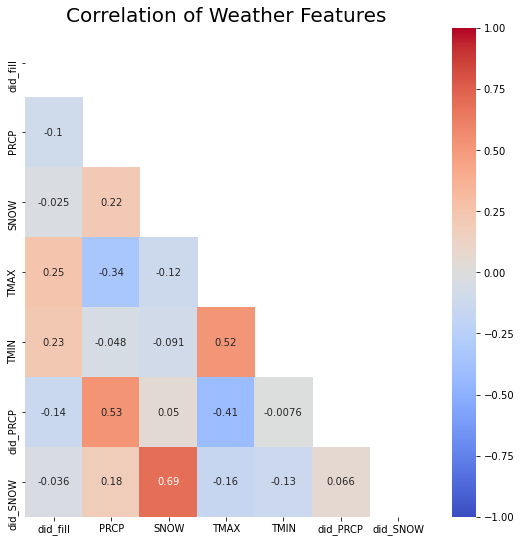

In [29]:
plt.figure(figsize=(9,9))

target = df[['did_fill'] + wx_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Weather Features',fontsize=20);

-----------

# Dependent Variable

#### What percent of available days did a campground fill?

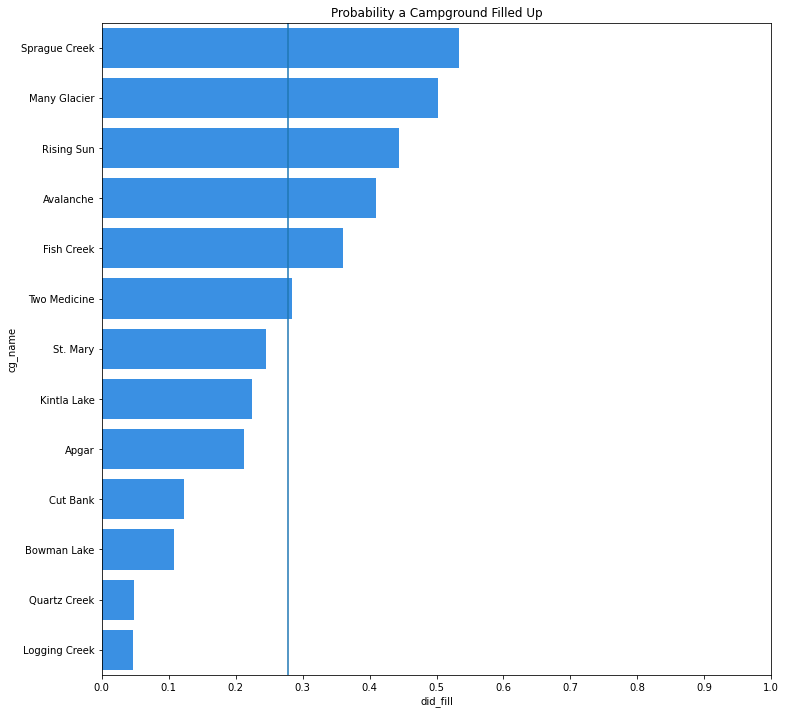

In [36]:
df_fill_perc = pd.DataFrame(
    df.groupby('cg_name')['did_fill'].mean(
    )).sort_values('did_fill',
                   ascending = False)

fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data = df_fill_perc,
            y = df_fill_perc.index,
            x = 'did_fill',
            color = 'dodgerblue',
            orient = 'h')

ax.set_title('Probability a Campground Filled Up')
ax.set_xticks(np.arange(0,1.1,0.1))
plt.axvline(df['did_fill'].mean());

#### How did this percent change over time?

In [37]:
df_fill_years = pd.DataFrame(df.groupby('year')['did_fill'].mean())



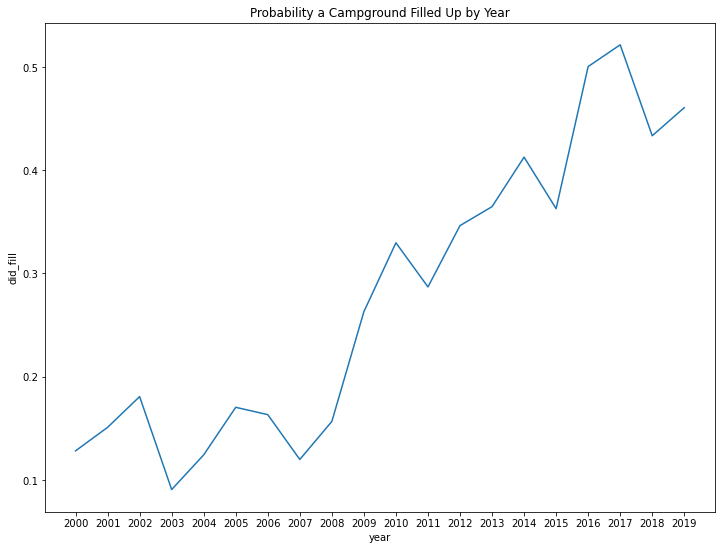

In [38]:
fig_dims = (12,9)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = df_fill_years,
            x = df_fill_years.index,
            y = 'did_fill')


ax.set_title('Probability a Campground Filled Up by Year')
ax.set_xticks(list(df_fill_years.index));